In [3]:
import pymongo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


## MongoDB Query and Usage

In [4]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["tweets"]
mydb.mycol.remove({})
myquery = { "username": "Google" }

mydoc = mycol.find(myquery)

sent_score_list = []
for j in mydoc:
    sent_score_list.append(j['score'])
    #print(j['score'])



/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.


In [33]:
### Delete all tweets relating to username!
#myquery = { "username": "Apple " }
#mycol.delete_many(myquery)

[Text(0, 0.5, 'Score Frequency Percentage'), Text(0.5, 0, 'Sentiment Score')]

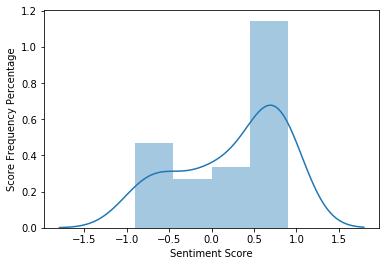

In [34]:
x = np.array(sent_score_list)
g = sns.distplot(x);
g.set(xlabel='Sentiment Score', ylabel='Score Frequency Percentage')

In [57]:
# query example for tweets containing word
import re

pat = re.compile(r'iphone', re.I)
mydoc = mycol.find({ "tweet": {'$regex': pat}})
pos_score = 0
neu_score = 0
neg_score = 0
for j in mydoc:
    score = float(j['score'])
    if score > 0:
        pos_score += 1
    elif score < 0:
        neg_score += 1
    else:
        neu_score += 1
        
    print(j)

{'_id': ObjectId('5dedc30259e9f90dd6df4df9'), 'username': 'Google', 'product': 'Pixel 4', 'score': -0.10000000149011612, 'tweet': 'That was shot on the iPhone 11 Pro in slowmo this is from the Pixel 4 from earlier and a different angle not in slowmo TeamPixel'}
{'_id': ObjectId('5dedc30659e9f90dd6df4e0c'), 'username': 'Google', 'product': 'Pixel 4', 'score': -0.8999999761581421, 'tweet': 'Well Google you finally did it I just embraced the other side By releasing a phone Pixel 4 XL with subpar specs mediocre battery I decided to go with the iPhone11ProMax google apple frompixel2iphone'}
{'_id': ObjectId('5dedc30659e9f90dd6df4e0d'), 'username': 'Google', 'product': 'Pixel 4', 'score': -0.699999988079071, 'tweet': 'Yap we are in the era of the ugly phone It started with the Google pixel 4 stove cameras then iPhone stove cameras now Samsung bringing a bigger stove'}


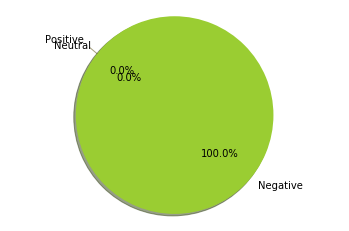

In [58]:
# Data to plot
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos_score, neg_score, neu_score]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## MySQL Query and Usage

In [10]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database="mydatabase"
)

mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM tweets")
myresult = mycursor.fetchall()
mydb.close()

sent_score_list = []
for j in myresult:
    sent_score_list.append(float(j[3]))
    print(j)

('Google', 'Pixel 4', 'RT Kissimmee Prairie stars for as far as the eye can see Pic is mine taken with a pixel 4 smartphone', Decimal('0.300'))
('Google', 'Pixel 4', 'That was shot on the iPhone 11 Pro in slowmo this is from the Pixel 4 from earlier and a different angle not in slowmo TeamPixel', Decimal('-0.100'))
('Google', 'Pixel 4', '699 Pixel 4 and 749 Pixel 4 XL to be had at Google Store this week Google', Decimal('-0.100'))
('Google', 'Pixel 4', 'what y all did with the Pixel4 is EVIL I lost half my stuff from a concert because of the bogus original quality choice I do NOT recommend the Pixel 4 until they fix this nonsense the camera is not even that great', Decimal('-0.900'))
('Google', 'Pixel 4', 'RT Admittedly the Night Shot option on the Pixel 4 makes suits with glow effects look awesome MFF2019', Decimal('0.900'))
('Google', 'Pixel 4', 'RT SOOC portrait mode on Pixel 4 XL AFRICAN U21 soccer players randomly approached on the street', Decimal('-0.400'))
('Google', 'Pixel 4',

In [ ]:
# MySQL table creation
#CREATE TABLE tweets (
#    username varchar(255),
#    product varchar(255), 
#    tweet varchar(8192),
#    score DECIMAL(5, 3)
#);

[Text(0, 0.5, 'Score Frequency Percentage'), Text(0.5, 0, 'Sentiment Score')]

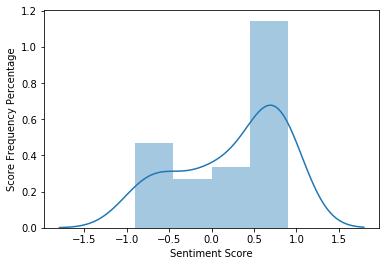

In [11]:
x = np.array(sent_score_list)
g = sns.distplot(x);
g.set(xlabel='Sentiment Score', ylabel='Score Frequency Percentage')